# CDC Hackathon: google trends data

## Summary:

- google trends data for flu-related user searches is highly seasonal.  
- We aggregated google trends data into regional and yearly data for easy comparison to other 


https://github.com/GeneralMills/pytrends




In [58]:
from pytrends.request import TrendReq
import seaborn as sns
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
import altair as alt

pytrends = TrendReq(hl='en-US', tz=360)

#kw_list = ["Flu Shot","flu shot kaiser","flu shot cvs","flu shot walgreens"]
kw_list = ["Flu Shot","flu shot kaiser","flu shot cvs","flu shot walgreens"]
#kw_list = ["Flu Shot"]
# pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US-AL', gprop='')
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US-CA', gprop='')


In [59]:
df = pytrends.interest_over_time()
df.head()

""


            Flu Shot  flu shot kaiser  flu shot cvs  flu shot walgreens
date                                                                   
2004-01-31         3                0             0                   0
2004-02-29         0                0             0                   0
2004-03-31         4                0             0                   0
2004-04-30         0                0             0                   0
2004-05-31         1                0             0                   0
2004-06-30         0                0             0                   0
2004-07-31         1                0             0                   0
2004-08-31         1                0             0                   0
2004-09-30         7                1             0                   1
2004-10-31        83                4             1                   3
2004-11-30        19                0             0                   1
2004-12-31        13                1             0             

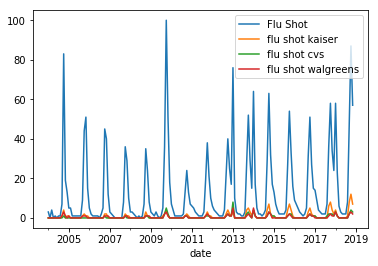

In [51]:
#grouped=df.reset_index().groupby(by=[pd.Grouper(key='date', freq='A-JUN')])
grouped=df.reset_index().groupby(by=[pd.Grouper(key='date', freq='M')])
print(grouped.sum().head(20))
grouped.sum().plot()

In [52]:
pytrends.related_topics()

{}

In [53]:
blub = pytrends.related_queries()
print(blub)

{'Flu Shot': {'top':                        query  value
0               the flu shot    100
1            flu shot kaiser     55
2                     kaiser     55
3      side effects flu shot     44
4                  flu shots     37
5               cvs flu shot     31
6                flu vaccine     31
7         walgreens flu shot     24
8                  walgreens     24
9              free flu shot     22
10           flu shot clinic     21
11              flu symptoms     21
12         flu shot symptoms     19
13             flu shot cost     18
14         flu shot pregnant     17
15             2017 flu shot     15
16             2018 flu shot     13
17    kaiser flu shot clinic     11
18  side effects of flu shot     10
19        pregnancy flu shot     10
20           flu shot costco     10
21         flu shot reaction      9
22          flu shot clinics      9
23                  rite aid      9
24             flu shot 2013      9, 'rising':                          query  

In [43]:
blub.keys()

dict_keys(['Flu Shot', 'kaiser flu shot', 'flu shot cvs', 'flu shot walgreens'])

In [48]:
for key in blub.keys():
    print(key)
    print(blub[key]['rising'])


Flu Shot
                         query   value
0              flu shot kaiser  812050
1                       kaiser  811900
2        side effects flu shot  655950
3                 cvs flu shot  463150
4           walgreens flu shot  358100
5                    walgreens  351400
6                2017 flu shot  218050
7                2018 flu shot  198350
8       kaiser flu shot clinic  160500
9     side effects of flu shot  148650
10          pregnancy flu shot  145700
11             flu shot costco  141550
12           flu shot reaction  140400
13                    rite aid  137800
14               flu shot 2013  136150
15           kaiser permanente  128700
16        what is the flu shot  128600
17  kaiser permanente flu shot  123700
18               flu shot 2014  120050
19               2016 flu shot  119550
20         sick after flu shot  114800
21               h1n1 flu shot  114100
22                   swine flu  114000
23              swine flu shot  112250
24        when t

In [30]:
blub['Flu Shot']['rising']


,query,value
0,cvs flu shot,445750
1,walgreens flu shot,388950
2,walgreens,372300
3,flu shot symptoms,306600
4,free flu shot,296750
5,flu shot cost,239650
6,flu shot 2018,213900
7,flu shot 2017,204100
8,side effects of flu shot,157850
9,kaiser flu shot clinic,147350


In [56]:
pd.merge(left=blub['flu shot kaiser']['rising'],right=blub['flu shot cvs']['rising'],how='outer',on='query')

,query,value_x,value_y
0,kaiser flu clinic,848350.0,NaN
1,flu shot clinic kaiser,842200.0,NaN
2,kaiser flu shots,495550.0,NaN
3,kaiser flu shot hours,419700.0,NaN
4,flu shot at kaiser,251500.0,NaN
5,kaiser flu shot 2017,201700.0,NaN
6,kaiser flu shot 2018,185450.0,NaN
7,flu shot 2017,183400.0,NaN
8,kaiser permanente flu shot clinic,181650.0,NaN
9,kaiser flu shot clinics,129400.0,NaN
